In [70]:
import numpy as np
import pandas as pd 

In [71]:
data = np.loadtxt('../data/logisticRegressionTumorSingle.csv', delimiter=',')

In [72]:
x = data[:,0] #1st Column
y = data[:,1] #2nd Column

In [73]:
print(x,y,sep="\n")

[0. 1. 2. 3. 4. 5. 6. 7.]
[0. 0. 0. 0. 1. 1. 1. 1.]


In [74]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

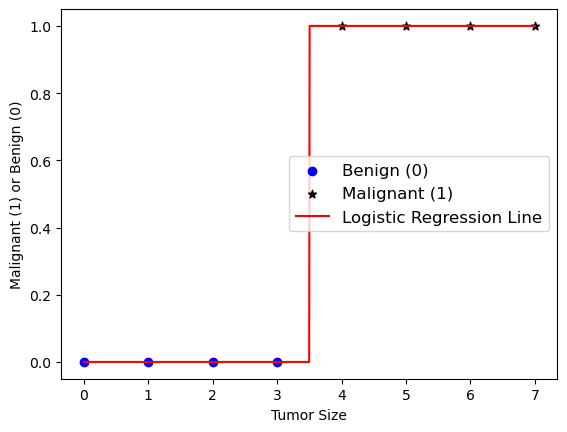

In [75]:
# Creating a logistic regression model
lr_model = LogisticRegression()
lr_model.fit(x.reshape(-1, 1), y)

# Generating x values for the line plot
x_line = np.linspace(min(x), max(x), 1000)

# Compute the predicted labels for the line plot
probs = lr_model.predict(x_line.reshape(-1, 1))

# Scatter plot of the data points
plt.scatter(x[y == 0], y[y == 0], marker='o', c='b', label="Benign (0)")
plt.scatter(x[y == 1], y[y == 1], marker='*', c='black', label="Malignant (1)")


# Plotting the logistic regression line
plt.plot(x_line, probs, color='r', label="Logistic Regression Line")

plt.xlabel('Tumor Size')
plt.ylabel('Malignant (1) or Benign (0)')
plt.legend(fontsize='large')
plt.show()

In [76]:
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy
from tensorflow.keras.activations import sigmoid

In [77]:
#1 logistic Neuron 
#input_dim: 1 -> (batch_size, 1) ; batch_size: no.of samples

model = Sequential(
    [
        Dense(1, input_dim=1,  activation = 'sigmoid', name='L1')
    ]
)

In [78]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [79]:
logistic_layer = model.get_layer('L1')
w,b = logistic_layer.get_weights()

print(f"Weights:{w}; Bias:{b}\n")
print(f"Shape:\nWeights{w.shape}; Bias {b.shape}")

Weights:[[0.5774621]]; Bias:[0.]

Shape:
Weights(1, 1); Bias (1,)


In [80]:
# Retrieve weights from the trained logistic regression model
set_weight = lr_model.coef_[0]
set_bias = lr_model.intercept_

print("Weights:", weights)
print("Bias:", bias)

Weights: [1.16976221]
Bias: [-4.09418835]


In [81]:
#weights: 2D-array
#bias: 1D-array 
logistic_layer.set_weights([set_weight.reshape(1, 1), set_bias])
print(logistic_layer.get_weights())

[array([[1.1697623]], dtype=float32), array([-4.094188], dtype=float32)]


In [83]:
a1 = model.predict(x[0].reshape(1,1))
print(f"Logistic Neuron:{a1}\n")

a1_output = logistic_layer(x[0].reshape(1,1))
print(f"Logistic Neuron Layer: {a1_output}\n")

#Matrix
aNum= sigmoid(set_weight.reshape(1,1) @ x[0].reshape(1,1) + set_bias)
print(f"Numpy: {aNum}\n")

#Vectors 
print("Tensor:",sigmoid(set_weight * x[0] + set_bias))

1/1 [==============================] - 0s 16ms/step
Logistic Neuron:[[0.01639596]]

Logistic Neuron Layer: [[0.01639596]]

Numpy: [[0.01639596]]

Tensor: tf.Tensor([0.01639596], shape=(1,), dtype=float64)
